In [22]:
#import libraries
import pandas as pd
import re
import numpy as np 
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_csv("C:\\Users\\shama\\Desktop\\ExcelR Projects\\DS project 3\\financial_sentiment_data.csv")

In [3]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
# Checking if there is any duplicates in the dataset

df.duplicated().sum()

6

In [6]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)

In [7]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [7]:
# Checking if there is any duplicates in the sentence column

df[df.duplicated(['Sentence'])]

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [8]:
df.describe()

,Sentence,Sentiment
count,5836,5836
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3124


In [9]:
neutral_count = 0
positive_count = 0
negative_count = 0

for i in df['Sentiment']:
    if i == 'neutral':
        neutral_count += 1
    elif i == 'positive':
        positive_count += 1
    elif i == 'negative':
        negative_count += 1

total_count = len(df)
neutral_percent = format((neutral_count / total_count) * 100, '.2f')
positive_percent = format((positive_count / total_count) * 100, '.2f')
negative_percent = format((negative_count / total_count) * 100, '.2f')

print(f'{neutral_percent}% people have neutral sentiment')
print(f'{positive_percent}% people have positive sentiment')
print(f'{negative_percent}% people have negative sentiment')

53.53% people have neutral sentiment
31.73% people have positive sentiment
14.74% people have negative sentiment


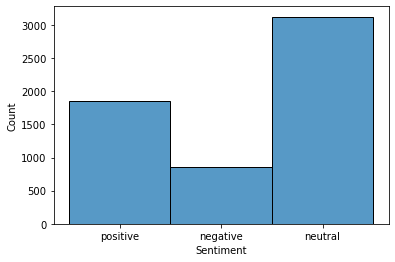

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
sns.histplot(x = "Sentiment",data = df)
plt.show()

Neutral sentiments are found to be more in the dataset i.e. around 3000 followed by positive and negative.

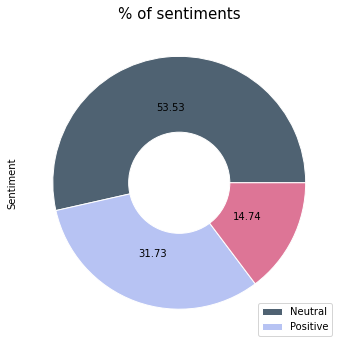

In [11]:
#Pie chart
colors = ['#4F6272', '#B7C3F3', '#DD7596']
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.Sentiment.value_counts().head(3).plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors).legend(labels={
                     "Neutral",
                     "Positive",
                     })
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('% of sentiments', size=15)
plt.tight_layout()
#plt.savefig('images/donut_chart.png', dpi=300)
plt.show()

53% sentiments are neutral, 31% sentiments are positive and 14% are negative

In [8]:
#Text Cleaning
def Text_Cleaning(Text):    
    # Lowercase the texts
    Text = Text.lower()

    # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

    # Removing links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text

#Text Preprocessing
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):    
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of Words
    Tokens = nltk.word_tokenize(Text)

    # Removing Stopwords and Lemmatizing Words

    for word in Tokens:
        if word not in Stopwords:            
            Processed_Text.append(Lemmatizer.lemmatize(word))            
    return(" ".join(Processed_Text))

In [15]:
#Apply the functions
df['Sentence'] = df['Sentence'].apply(Text_Cleaning).apply(Text_Processing)

In [16]:
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnish russian chamber commerce maj...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking first used summer training meth...,neutral
5839,according shipping company viking line eu deci...,neutral
5840,building home improvement trade sale decreased...,neutral


In [15]:
df.to_csv("financial_cleaned.csv",index=False)

In [17]:
df["Length"]=df['Sentence'].str.len()

In [18]:
df

,Sentence,Sentiment,Length
0,geosolutions technology leverage benefon gps s...,positive,182
1,esi low bk real possibility,negative,27
2,last quarter componenta net sale doubled eurm ...,positive,114
3,according finnish russian chamber commerce maj...,neutral,94
4,swedish buyout firm sold remaining percent sta...,neutral,100
...,...,...,...
5837,rising cost forced packaging producer huhtamak...,negative,85
5838,nordic walking first used summer training meth...,neutral,68
5839,according shipping company viking line eu deci...,neutral,79
5840,building home improvement trade sale decreased...,neutral,53


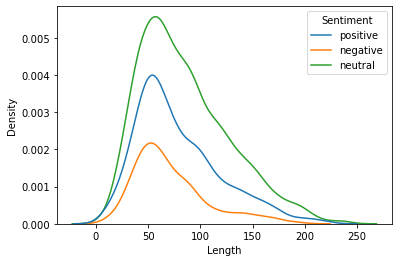

In [23]:
# Density Plot for Sentiments
import seaborn as sns
sns.kdeplot(x='Length',hue='Sentiment',data=df)
plt.show()

The density of neutral sentiment is higher and all sentiments are right skewed

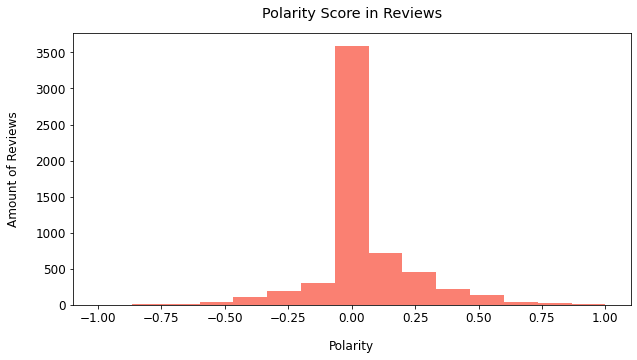

In [19]:
#Polarity scores
from textblob import TextBlob
df["Polarity"] = df["Sentence"].map(lambda Text: TextBlob(Text).sentiment.polarity)
df["Polarity"].plot(kind = "hist", bins = 15, linewidth = 1, color = "salmon", figsize = (10,5))

plt.title("Polarity Score in Reviews", pad = 15)
plt.xlabel("Polarity", labelpad = 15)

plt.ylabel("Amount of Reviews", labelpad = 15)
#plt.savefig('images/polarity_score.png', dpi=300)
plt.show()

Polarity scores lies between -1 to +1 (-1 refers negative and +1 refers positive and 0 refers to neutral which are around 3500)

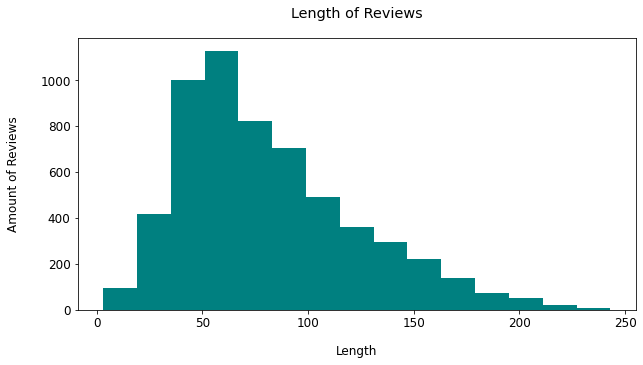

In [20]:
#Length of reviews
df["Length"] = df["Sentence"].astype(str).apply(len)
df["Length"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (10,5))
plt.title("Length of Reviews", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Amount of Reviews",labelpad = 20)
plt.show()

Length of the words is highest between 60 to 70 and is right-skewed

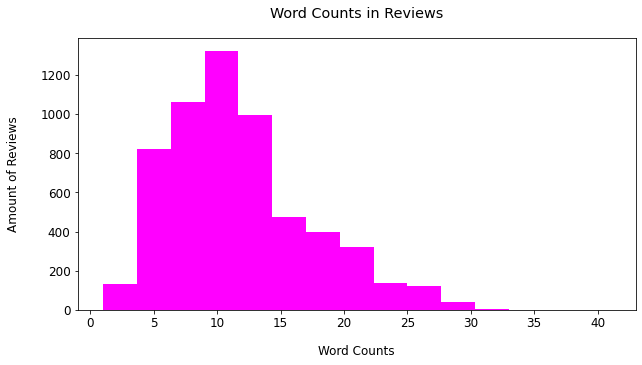

In [21]:
#Word counts
df["Word Counts"] = df["Sentence"].apply(lambda x: len(str(x).split()))
df["Word Counts"].plot(kind = "hist", bins = 15, linewidth = 1, color = "magenta", figsize = (10,5))
plt.title("Word Counts in Reviews", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Amount of Reviews", labelpad = 20)
plt.show()

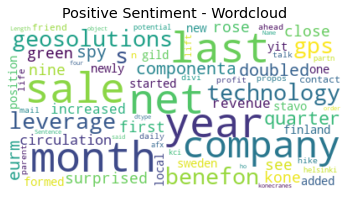

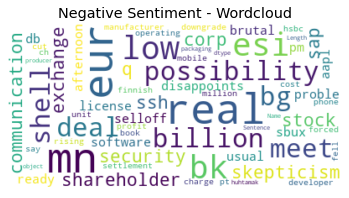

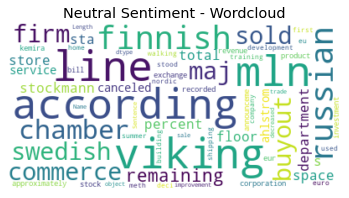

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive Sentences
positive_tweets = df['Sentence'][df["Sentiment"] == 'positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Sentiment - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative Sentences
negative_tweets = df['Sentence'][df["Sentiment"] == 'negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Sentiment - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with neutral Sentences
neutral_tweets = df['Sentence'][df["Sentiment"] == 'neutral']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Sentiment - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()